In [4]:
import finesse
finesse.configure(plotting=True)

# Two mirror cavity

<img src="https://finesse.ifosim.org/docs/develop/_images/fabry_perot_example1.svg" width="600"/>

In [2]:
cavity = finesse.Model()
cavity.parse(
    """
    # Add a Laser named l1 with a power of 1 W.
    l l1 P=1

    # Space attaching l1 <-> m1 with length of 1 m
    s s0 l1.p1 m1.p1 L=1

    # Input mirror of cavity.
    m m1 R=0.99 T=0.01

    # Intra-cavity space with length of 1 m.
    s cav m1.p2 m2.p1 L=1

    # End mirror of cavity.
    m m2 R=0.991 T=0.009

    # Power detectors on reflection, circulation and transmission.
    pd refl m1.p1.o
    pd circ m2.p1.i
    pd trans m2.p2.o

    # Scan over the detuning DOF of m1 from -180 deg to +180 deg with 400 points.
    xaxis(m1.phi, lin, -180, 180, 400)
    """
)

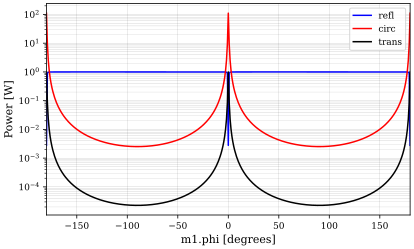

In [3]:
out = cavity.run()
out.plot(logy=True);